In [1]:
from chesslab_.agent_torch import agent
from chesslab_.agent_stockfish import agent as s_agent
from chesslab_.tests import kaufman_test
import chess
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch.nn as nn
class Model_1(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.func_1=nn.ELU()
        self.func_2=nn.ELU()
        self.func_3=nn.ELU()
        self.func_4=nn.ELU()
        
        self.cnn_1 = nn.Conv2d(3, 32, kernel_size=7,padding=3)
        self.cnn_2 = nn.Conv2d(32, 64, kernel_size=5,padding=2)
        self.cnn_3 = nn.Conv2d(64, 128, kernel_size=3,padding=1)

        self.linear_1 = nn.Linear(8*8*128,256 )
        self.linear_2 = nn.Linear(256, 2)

    def forward(self, x ):
        out = self.cnn_1(x)
        out = self.func_1(out)
        out = self.cnn_2(out)
        out = self.func_2(out)
        out = self.cnn_3(out)
        out = self.func_3(out)
        out = out.reshape([x.size(0), -1])
        out = self.linear_1(out)
        out = self.func_4(out)
        out = self.linear_2(out)

        return out
model = Model_1()

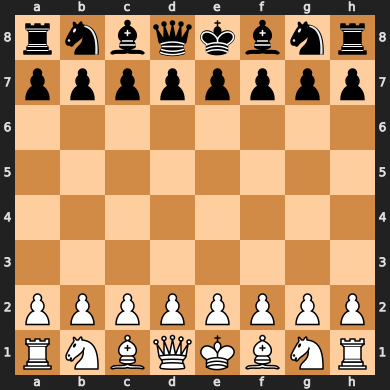

In [3]:
board=chess.Board()
board

In [4]:
base_name = './tmp/test_noeaten.0.'
deepbot = agent(base_name+'1.pt',model)
move=deepbot.select_move(board)
move

Move.from_uci('b1c3')

In [5]:
moves,values=deepbot.get_move_values(board)

In [6]:
moves

[Move.from_uci('g1h3'),
 Move.from_uci('g1f3'),
 Move.from_uci('b1c3'),
 Move.from_uci('b1a3'),
 Move.from_uci('h2h3'),
 Move.from_uci('g2g3'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('c2c3'),
 Move.from_uci('b2b3'),
 Move.from_uci('a2a3'),
 Move.from_uci('h2h4'),
 Move.from_uci('g2g4'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4'),
 Move.from_uci('c2c4'),
 Move.from_uci('b2b4'),
 Move.from_uci('a2a4')]

In [7]:
values

array([0.6008826 , 0.58938366, 0.6230302 , 0.5788227 , 0.60501385,
       0.5811861 , 0.5884521 , 0.5889214 , 0.5963254 , 0.60244757,
       0.5793248 , 0.5906902 , 0.6102305 , 0.58446985, 0.5930054 ,
       0.605955  , 0.6225703 , 0.609306  , 0.59331584, 0.60869795],
      dtype=float32)

In [8]:
from chesslab_.utils import join_and_sort
join_and_sort(moves,values)

array([[Move.from_uci('b1c3'), 0.6230301856994629],
       [Move.from_uci('d2d4'), 0.622570276260376],
       [Move.from_uci('h2h4'), 0.6102305054664612],
       [Move.from_uci('c2c4'), 0.6093059778213501],
       [Move.from_uci('a2a4'), 0.6086979508399963],
       [Move.from_uci('e2e4'), 0.6059550046920776],
       [Move.from_uci('h2h3'), 0.6050138473510742],
       [Move.from_uci('c2c3'), 0.6024475693702698],
       [Move.from_uci('g1h3'), 0.6008825898170471],
       [Move.from_uci('d2d3'), 0.5963253974914551],
       [Move.from_uci('b2b4'), 0.593315839767456],
       [Move.from_uci('f2f4'), 0.5930054187774658],
       [Move.from_uci('a2a3'), 0.5906901955604553],
       [Move.from_uci('g1f3'), 0.5893836617469788],
       [Move.from_uci('e2e3'), 0.5889214277267456],
       [Move.from_uci('f2f3'), 0.5884521007537842],
       [Move.from_uci('g2g4'), 0.5844698548316956],
       [Move.from_uci('g2g3'), 0.5811861157417297],
       [Move.from_uci('b2b3'), 0.5793247818946838],
       [Move.f

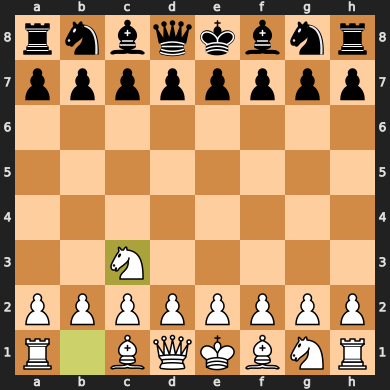

In [9]:
board.push(move)
board

In [10]:
kaufman_test(deepbot)

0.24

Accuracy: 0.24


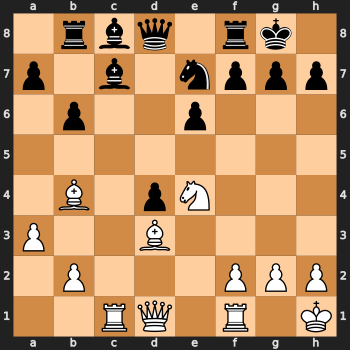

best move / move predicted: e4f6 / c1c7
01 - move: c1c7: 0.8669
02 - move: b4e7: 0.7783
03 - move: d1h5: 0.7709
04 - move: c1c6: 0.7030
05 - move: d1g4: 0.6870
06 - move: c1c5: 0.6820
07 - move: c1c4: 0.6297
08 - move: f2f4: 0.6226
09 - move: c1c3: 0.6215
10 - move: f1g1: 0.6154
11 - move: g2g4: 0.6143
12 - move: h2h4: 0.6111
13 - move: b4d6: 0.6088
14 - move: c1c2: 0.6022
15 - move: h2h3: 0.6016
16 - move: e4f6: 0.5974
17 - move: d1f3: 0.5967
18 - move: d1e2: 0.5938
19 - move: d1d2: 0.5883
20 - move: f2f3: 0.5803
21 - move: d1e1: 0.5772
22 - move: b4c5: 0.5676
23 - move: e4d6: 0.5605
24 - move: d3c4: 0.5544
25 - move: h1g1: 0.5519
26 - move: b4c3: 0.5513
27 - move: g2g3: 0.5495
28 - move: d1c2: 0.5494
29 - move: a3a4: 0.5449
30 - move: d3c2: 0.5414
31 - move: d3b1: 0.5357
32 - move: e4g5: 0.5354
33 - move: f1e1: 0.5294
34 - move: b2b3: 0.5282
35 - move: b4e1: 0.5203
36 - move: d3a6: 0.5187
37 - move: d3b5: 0.5186
38 - move: d3e2: 0.5171
39 - move: c1b1: 0.5166
40 - move: b4d2: 0.5080


In [11]:
import chess.svg
from IPython.display import display
#deepbot = chess_torch_agent('./tmp/model_v1.0.2.h5')
acc,boards,best_moves,move_details,data = kaufman_test(deepbot,details=2)
print('Accuracy: {}'.format(acc))
for i in range(1):
    print('='*50)
    display(chess.svg.board(boards[i],size=350))
    print('best move / move predicted: {} / {}'.format(best_moves[i],move_details[i][0][0]))
    for j,(m,v) in enumerate(move_details[i]):
        print('{:02d} - move: {}: {:.4f}'.format(j+1,m,v))

In [11]:
import chess.svg
from IPython.display import display
deepbot = agent('{}{}.pt'.format(base_name,1),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

Accuracy: 6/25 = 0.24
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 16 & 48 & 0.6809 & 0.5974 & c1c7 & 0.8669  \\
02 & f5d4 & 15 & 39 & 0.6316 & 0.5390 & d7d4 & 0.7291  \\
03 & e1d1 & 27 & 38 & 0.2973 & 0.3546 & f2c5 & 0.8550  \\
04 & b1b2 & 1 & 47 & 1.0000 & 0.7348 & b1b2 & 0.7348  \\
05 & g5c1 & 2 & 48 & 0.9787 & 0.8516 & c8c3 & 0.9096  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.4619 & a3a2 & 0.4619  \\
07 & b7e4 & 5 & 33 & 0.8750 & 0.4628 & c7c4 & 0.5134  \\
08 & h7h6 & 24 & 39 & 0.3947 & 0.2531 & e1c1 & 0.7495  \\
09 & f3e2 & 33 & 35 & 0.0588 & 0.4897 & d2f4 & 0.6260  \\
10 & d5c3 & 4 & 41 & 0.9250 & 0.6046 & c7c3 & 0.7290  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.8497 & g3f5 & 0.8497  \\
12 & c6d6 & 37 & 41 & 0.1000 & 0.1024 & e7e3 & 0.3077  \\
13 & c3d5 & 6 & 30 & 0.8276 & 0.7864 & f1f6 & 0.9535  \\
14 & b1b2 & 43 & 49 & 0.1250 & 0.6954 & d3g6 & 0.9363  \\
15 & d3f5 & 3 & 51 & 0.9600 & 0.8722 & e1e6 & 0.9169  \\
16 & b3b4 & 2 & 10 & 0.8889 & 0.5593 & d2e3 & 0.6455  \\


In [12]:
deepbot = agent('{}{}.pt'.format(base_name,2),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

Accuracy: 5/25 = 0.2
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 9 & 48 & 0.8298 & 0.5466 & c1c7 & 0.8204  \\
02 & f5d4 & 17 & 39 & 0.5789 & 0.5932 & a5a3 & 0.7766  \\
03 & e1d1 & 12 & 38 & 0.7027 & 0.4542 & g2g4 & 0.7077  \\
04 & b1b2 & 1 & 47 & 1.0000 & 0.7810 & b1b2 & 0.7810  \\
05 & g5c1 & 3 & 48 & 0.9574 & 0.5022 & c8c3 & 0.7683  \\
06 & a3a2 & 2 & 31 & 0.9667 & 0.4559 & a3e3 & 0.4675  \\
07 & b7e4 & 14 & 33 & 0.5938 & 0.3093 & f6e4 & 0.4436  \\
08 & h7h6 & 9 & 39 & 0.7895 & 0.5767 & e1c1 & 0.7829  \\
09 & f3e2 & 12 & 35 & 0.6765 & 0.5659 & d2g5 & 0.6384  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.6644 & c7c3 & 0.6906  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.9001 & g3f5 & 0.9001  \\
12 & c6d6 & 14 & 41 & 0.6750 & 0.0487 & e7e4 & 0.1719  \\
13 & c3d5 & 2 & 30 & 0.9655 & 0.9816 & f1f6 & 0.9971  \\
14 & b1b2 & 39 & 49 & 0.2083 & 0.4264 & d3g6 & 0.8943  \\
15 & d3f5 & 4 & 51 & 0.9400 & 0.7839 & h6e6 & 0.8611  \\
16 & b3b4 & 2 & 10 & 0.8889 & 0.5825 & d2e3 & 0.7039  \\
17

In [13]:
deepbot = agent('{}{}.pt'.format(base_name,3),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

Accuracy: 7/25 = 0.28
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 6 & 48 & 0.8936 & 0.6028 & c1c7 & 0.8570  \\
02 & f5d4 & 21 & 39 & 0.4737 & 0.6340 & a5d2 & 0.8480  \\
03 & e1d1 & 21 & 38 & 0.4595 & 0.5060 & f2c5 & 0.9166  \\
04 & b1b2 & 1 & 47 & 1.0000 & 0.7354 & b1b2 & 0.7354  \\
05 & g5c1 & 2 & 48 & 0.9787 & 0.9494 & c8c3 & 0.9652  \\
06 & a3a2 & 1 & 31 & 1.0000 & 0.5175 & a3a2 & 0.5175  \\
07 & b7e4 & 28 & 33 & 0.1562 & 0.4157 & c8e8 & 0.5566  \\
08 & h7h6 & 11 & 39 & 0.7368 & 0.3948 & e1c1 & 0.8030  \\
09 & f3e2 & 8 & 35 & 0.7941 & 0.5897 & d2h6 & 0.7519  \\
10 & d5c3 & 2 & 41 & 0.9750 & 0.7615 & c7a5 & 0.7646  \\
11 & g3f5 & 1 & 35 & 1.0000 & 0.8507 & g3f5 & 0.8507  \\
12 & c6d6 & 14 & 41 & 0.6750 & 0.0049 & e7e4 & 0.0164  \\
13 & c3d5 & 8 & 30 & 0.7586 & 0.9945 & f1f6 & 0.9999  \\
14 & b1b2 & 39 & 49 & 0.2083 & 0.3167 & d3g6 & 0.9083  \\
15 & d3f5 & 6 & 51 & 0.9000 & 0.6632 & h6f8 & 0.8363  \\
16 & b3b4 & 1 & 10 & 1.0000 & 0.7953 & b3b4 & 0.7953  \\
1

In [14]:
deepbot = agent('{}{}.pt'.format(base_name,30),model)
acc,data = kaufman_test(deepbot,details=1)
print('Accuracy: {:.0f}/25 = {}'.format(acc*25,acc))
print('id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. ')
for i,(best_move,value,move_predicted,value_predicted,rank,tot,weight) in enumerate(data):
    print('{:02d} & {} & {} & {} & {:.4f} & {:.4f} & {} & {:.4f}  \\\\'.format(i+1,best_move,rank,tot,weight,value,move_predicted,value_predicted))

Accuracy: 2/25 = 0.08
id & Mejor & Pos. & Total & Peso & V.F.E & Pred. & V.F.E. 
01 & e4f6 & 35 & 48 & 0.2766 & 0.0003 & c1c3 & 0.9617  \\
02 & f5d4 & 6 & 39 & 0.8684 & 1.0000 & g8f8 & 1.0000  \\
03 & e1d1 & 22 & 38 & 0.4324 & 0.0000 & f2c5 & 1.0000  \\
04 & b1b2 & 6 & 47 & 0.8913 & 0.9998 & d2d3 & 1.0000  \\
05 & g5c1 & 2 & 48 & 0.9787 & 0.9367 & c8c3 & 0.9898  \\
06 & a3a2 & 2 & 31 & 0.9667 & 0.9915 & a8a6 & 0.9985  \\
07 & b7e4 & 4 & 33 & 0.9062 & 0.3760 & c7c5 & 0.4762  \\
08 & h7h6 & 28 & 39 & 0.2895 & 0.0147 & b6c4 & 0.9145  \\
09 & f3e2 & 21 & 35 & 0.4118 & 0.1043 & e5e6 & 0.9753  \\
10 & d5c3 & 14 & 41 & 0.6750 & 0.4591 & c7f4 & 0.9987  \\
11 & g3f5 & 10 & 35 & 0.7353 & 0.9683 & c7d8 & 1.0000  \\
12 & c6d6 & 10 & 41 & 0.7750 & 0.0227 & g8f7 & 0.2226  \\
13 & c3d5 & 9 & 30 & 0.7241 & 0.9987 & d3g6 & 1.0000  \\
14 & b1b2 & 21 & 49 & 0.5833 & 0.7568 & d3g6 & 0.9995  \\
15 & d3f5 & 14 & 51 & 0.7400 & 0.8399 & h6f8 & 1.0000  \\
16 & b3b4 & 3 & 10 & 0.7778 & 0.2317 & d2c2 & 0.9973  \

In [15]:
import pandas as pd

In [16]:
pd.DataFrame(data,columns=["best_move","value","move_predicted","value_predicted","rank","total moves","weight"])

,best_move,value,move_predicted,value_predicted,rank,total moves,weight
0,e4f6,3.276996e-04,c1c3,0.961737,35,48,0.276596
1,f5d4,9.999999e-01,g8f8,1.000000,6,39,0.868421
2,e1d1,2.167564e-05,f2c5,0.999980,22,38,0.432432
3,b1b2,9.997680e-01,d2d3,0.999999,6,47,0.891304
4,g5c1,9.367268e-01,c8c3,0.989761,2,48,0.978723
5,a3a2,9.915377e-01,a8a6,0.998538,2,31,0.966667
6,b7e4,3.760390e-01,c7c5,0.476222,4,33,0.906250
7,h7h6,1.465430e-02,b6c4,0.914509,28,39,0.289474
8,f3e2,1.042647e-01,e5e6,0.975286,21,35,0.411765
9,d5c3,4.590622e-01,c7f4,0.998749,14,41,0.675000


In [17]:
exact_acc = np.zeros(30)
for i in range(1,30+1):
    deepbot = agent('{}{}.pt'.format(base_name,i),model)
    acc  = kaufman_test(deepbot,details=0)
    exact_acc[i-1]=acc
    print('Epoca: {}, accuracy: {}'.format(i,acc))

train_acc_model = np.array(deepbot.history['train']['acc'])
test_acc_model = np.array(deepbot.history['test']['acc'])


Epoca: 1, accuracy: 0.24
Epoca: 2, accuracy: 0.2
Epoca: 3, accuracy: 0.28
Epoca: 4, accuracy: 0.24
Epoca: 5, accuracy: 0.16
Epoca: 6, accuracy: 0.2
Epoca: 7, accuracy: 0.24
Epoca: 8, accuracy: 0.16
Epoca: 9, accuracy: 0.24
Epoca: 10, accuracy: 0.12
Epoca: 11, accuracy: 0.16
Epoca: 12, accuracy: 0.2
Epoca: 13, accuracy: 0.2
Epoca: 14, accuracy: 0.12
Epoca: 15, accuracy: 0.08
Epoca: 16, accuracy: 0.08
Epoca: 17, accuracy: 0.08
Epoca: 18, accuracy: 0.12
Epoca: 19, accuracy: 0.08
Epoca: 20, accuracy: 0.12
Epoca: 21, accuracy: 0.08
Epoca: 22, accuracy: 0.04
Epoca: 23, accuracy: 0.12
Epoca: 24, accuracy: 0.08
Epoca: 25, accuracy: 0.08
Epoca: 26, accuracy: 0.12
Epoca: 27, accuracy: 0.08
Epoca: 28, accuracy: 0.08
Epoca: 29, accuracy: 0.08
Epoca: 30, accuracy: 0.08


In [18]:
valuable_acc = np.zeros(30)
for i in range(1,30+1):
    deepbot = agent('{}{}.pt'.format(base_name,i),model)
    acc  = kaufman_test(deepbot,details=3)
    valuable_acc[i-1]=acc
    print('Epoca: {}, accuracy: {}'.format(i,acc))

Epoca: 1, accuracy: 0.7006548164731266
Epoca: 2, accuracy: 0.7633939373953411
Epoca: 3, accuracy: 0.7775658177171999
Epoca: 4, accuracy: 0.6958339943126959
Epoca: 5, accuracy: 0.7318780440293057
Epoca: 6, accuracy: 0.6996971918225746
Epoca: 7, accuracy: 0.6605999664345842
Epoca: 8, accuracy: 0.6331134398355177
Epoca: 9, accuracy: 0.5953071178329069
Epoca: 10, accuracy: 0.5585782089786129
Epoca: 11, accuracy: 0.6405657587530956
Epoca: 12, accuracy: 0.6116372622487948
Epoca: 13, accuracy: 0.623601282736137
Epoca: 14, accuracy: 0.6464750979959777
Epoca: 15, accuracy: 0.5451894579725978
Epoca: 16, accuracy: 0.6161230741091586
Epoca: 17, accuracy: 0.5892154182314624
Epoca: 18, accuracy: 0.5549825994595088
Epoca: 19, accuracy: 0.5765868589060881
Epoca: 20, accuracy: 0.5926180265397744
Epoca: 21, accuracy: 0.522639753460491
Epoca: 22, accuracy: 0.577445119616024
Epoca: 23, accuracy: 0.5355982956847454
Epoca: 24, accuracy: 0.5449582995758823
Epoca: 25, accuracy: 0.5929100351432706
Epoca: 26, a

In [22]:
path = 'E:/database/stockfish_14.exe'
deepbot = s_agent(path)
ss = kaufman_test(deepbot)
print("Exactitud para función de stockfish usando prueba de kaufman {}".format(ss))
ssp  = kaufman_test(deepbot,details=3)
print("Exactitud para función de stockfish usando prueba de kaufman ponderada {}".format(ssp))
ss = np.repeat(ss,30)
ssp = np.repeat(ssp,30)

Exactitud para función de stockfish usando prueba de kaufman 0.2
Exactitud para función de stockfish usando prueba de kaufman ponderada 0.5521934119046038


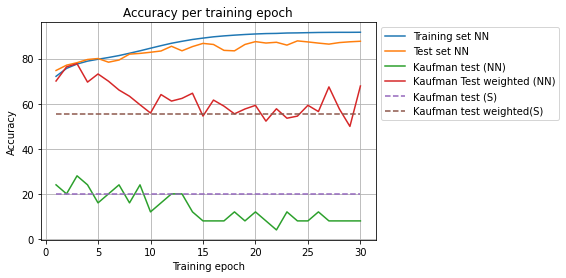

In [20]:
x = np.arange(30)+1
plt.plot(x,train_acc_model*100)
plt.plot(x,test_acc_model*100)
plt.plot(x,exact_acc*100)
plt.plot(x,valuable_acc*100)
plt.plot(x,ss*100,linestyle='dashed')
plt.plot(x,ssp*100,linestyle='dashed')
plt.title('Accuracy per training epoch')
plt.xlabel('Training epoch')
plt.ylabel('Accuracy')
plt.legend(['Training set NN','Test set NN','Kaufman test (NN)','Kaufman Test weighted (NN)','Kaufman test (S)','Kaufman test weighted(S)'],bbox_to_anchor=(1, 1),loc=2)
plt.grid()
plt.savefig('grafica.png',bbox_inches="tight")
plt.show()

In [21]:
print('Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\\\')
print(' & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\\\')
for i in range(30):
    print('{:02d} & {:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\'.format(i+1,100*train_acc_model[i],100*test_acc_model[i],100*exact_acc[i],100*valuable_acc[i]))

Epoca & Conjunto de & Conjunto & Prueba & Prueba de \\
 & entrenamiento & de prueba & de Kaufman & Kaufman ponderada \\
01 & 72.15 & 74.74 & 24.00 & 70.07 \\
02 & 75.66 & 77.09 & 20.00 & 76.34 \\
03 & 77.60 & 78.20 & 28.00 & 77.76 \\
04 & 78.89 & 79.61 & 24.00 & 69.58 \\
05 & 79.72 & 80.05 & 16.00 & 73.19 \\
06 & 80.50 & 78.41 & 20.00 & 69.97 \\
07 & 81.36 & 79.38 & 24.00 & 66.06 \\
08 & 82.39 & 81.99 & 16.00 & 63.31 \\
09 & 83.46 & 82.32 & 24.00 & 59.53 \\
10 & 84.62 & 82.82 & 12.00 & 55.86 \\
11 & 85.75 & 83.39 & 16.00 & 64.06 \\
12 & 86.82 & 85.47 & 20.00 & 61.16 \\
13 & 87.69 & 83.47 & 20.00 & 62.36 \\
14 & 88.49 & 85.34 & 12.00 & 64.65 \\
15 & 89.11 & 86.76 & 8.00 & 54.52 \\
16 & 89.67 & 86.28 & 8.00 & 61.61 \\
17 & 90.09 & 83.66 & 8.00 & 58.92 \\
18 & 90.42 & 83.45 & 12.00 & 55.50 \\
19 & 90.70 & 86.29 & 8.00 & 57.66 \\
20 & 90.94 & 87.54 & 12.00 & 59.26 \\
21 & 91.11 & 86.92 & 8.00 & 52.26 \\
22 & 91.19 & 87.25 & 4.00 & 57.74 \\
23 & 91.36 & 85.99 & 12.00 & 53.56 \\
24 & 91.42 &